In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import DATAFILE_NAMES, TARGET_FEATURE, FIGSIZE, FIGSIZE_NARROW, load_all, target_split, mode_sequencer
from features import *
from models import *
from solutions import *

In [2]:
dfs = load_all()

In [3]:
# df = dfs[0].dropna()
# x, y = target_split(df)

# model = TransientFinder()
# t = model.predict(x, y)

# a = t.value_counts().sort_index(ascending=False)
# display(pd.concat([a, a / t.shape[0], ~(a / t.shape[0] < 0.01).cummin()], axis=1))
# plt.plot(a.index)

In [7]:
%%time
n = 1
df = dfs[n].dropna()
x, y = target_split(df)
c = len(y.unique())

model = TransientFinder(max_portion_of_transient_modes=1)
transient = model.predict(x, y, True)
transient = t_min_max(transient) * y.max()

pred = []

model = MyKMeans(c*2)
pred.append(pd.Series(model.fit_predict(x, y), index=y.index))

# model = MyAC(c)
# pred.append(pd.Series(model.fit_predict(x, y), index=y.index))

# model = SolutionMain1(c, data_file=DATAFILE_NAMES[n], try_to_read_dump=True)
# pred.append(model.get_solution())

Wall time: 20.8 s


In [5]:
# %%time
# model = TransientFinder()
# x0, y0 = model.process_df(x, y)

# a = y0.diff().reset_index(drop=True)
# a = a[a != 0].index

# delta = 50
# for i in a[15:]:
#     print(y.index[i])
#     _, ax = plt.subplots(figsize=FIGSIZE)
#     dx = x0.iloc[max(i - delta, 0):min(i + delta, x0.shape[0])].reset_index(drop=True)
#     dx_min_max = [dx.min().min(), dx.max().max()]
#     # ddx = t_min_max(dx.diff().abs().max(axis=1)) * (dx_min_max[1] - dx_min_max[0]) + dx_min_max[0]
#     # ddx = t_min_max(dx.rolling(3).mean().diff().max(axis=1)) * (dx_min_max[1] - dx_min_max[0]) + dx_min_max[0]
#     # ddx.plot(ax=ax)
#     dx.plot(ax=ax)
#     ax.plot([dx.shape[0] // 2] * 2, dx_min_max)
    
#     dy = y.iloc[max(i - delta, 0):min(i + delta, x0.shape[0])].reset_index(drop=True)
#     for iind in dy.diff()[dy.diff() != 0].dropna().index:
#         ax.plot([iind] * 2, dx_min_max, c='r', ls='-.')
    
#     for ipred in pred:
#         dp = ipred.iloc[max(i - delta, 0):min(i + delta, x0.shape[0])].reset_index(drop=True)
#         for iind in dp.diff()[dp.diff() != 0].dropna().index:
#             ax.plot([iind] * 2, dx_min_max, c='k', ls='--')
#     break

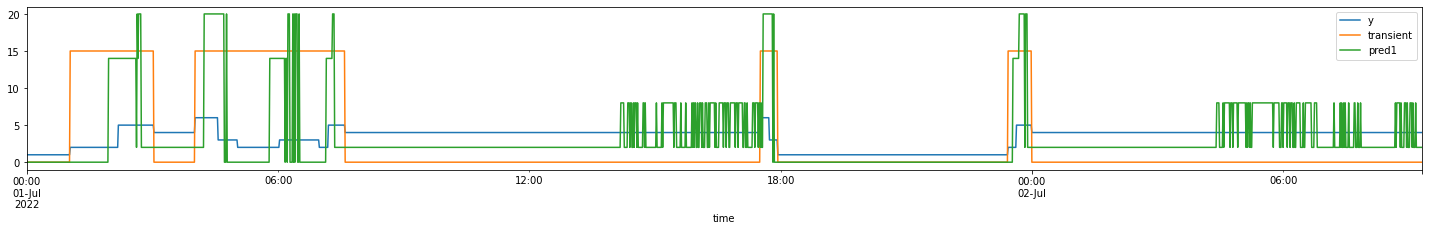

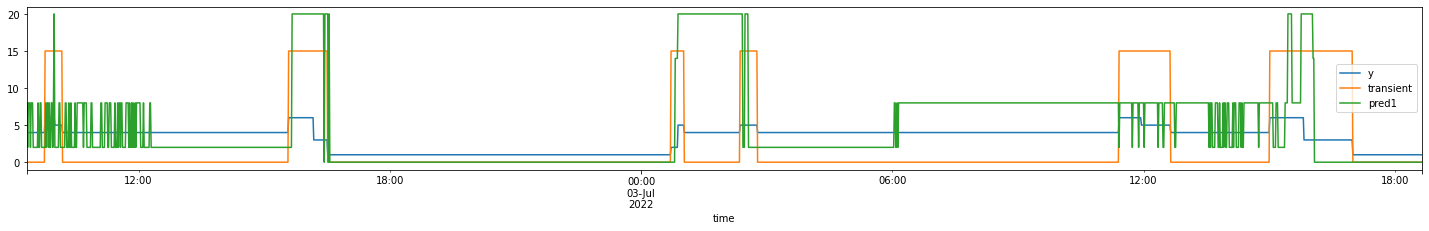

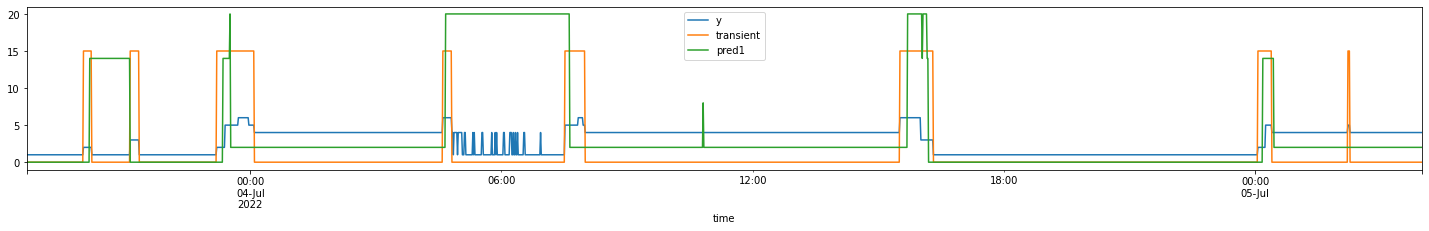

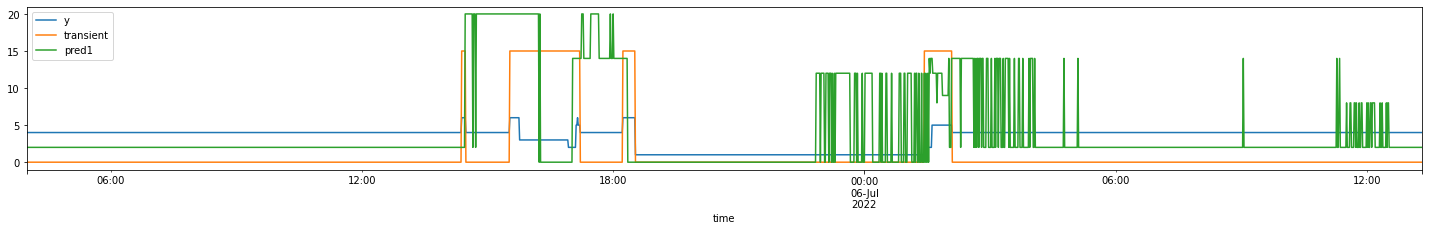

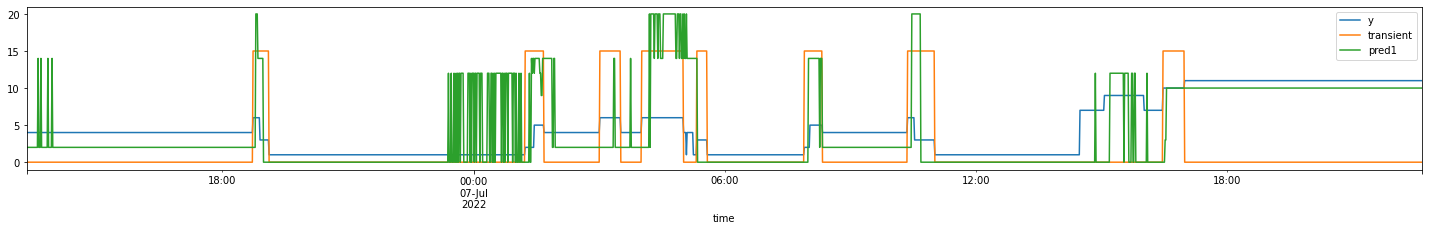

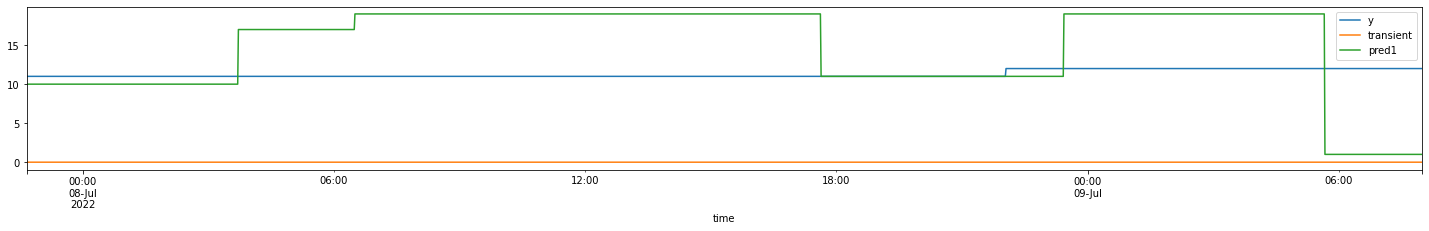

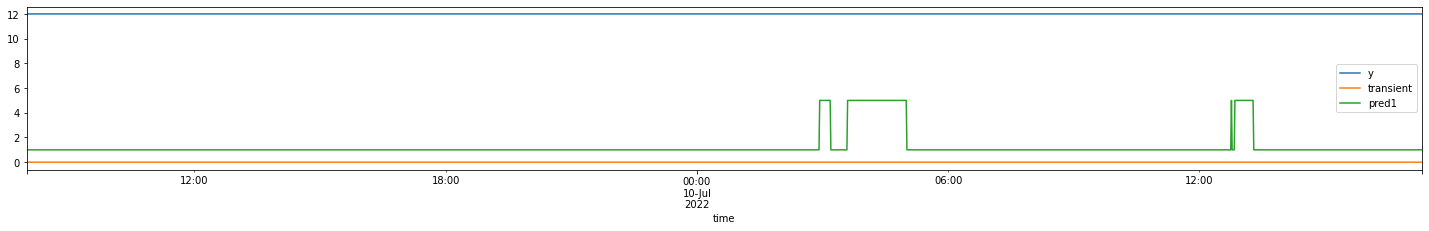

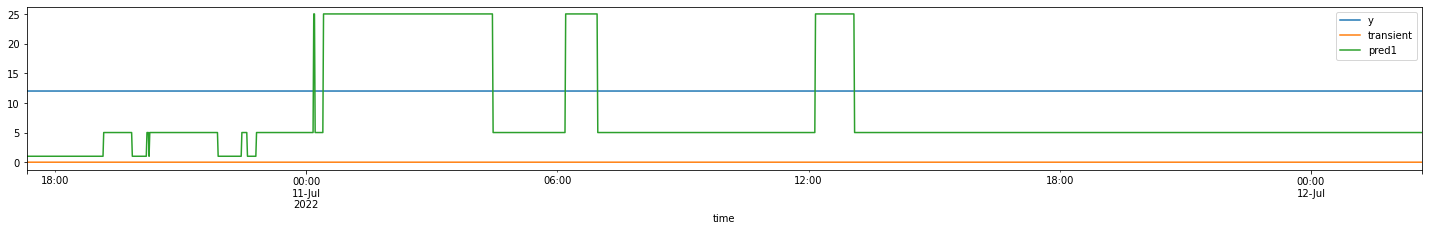

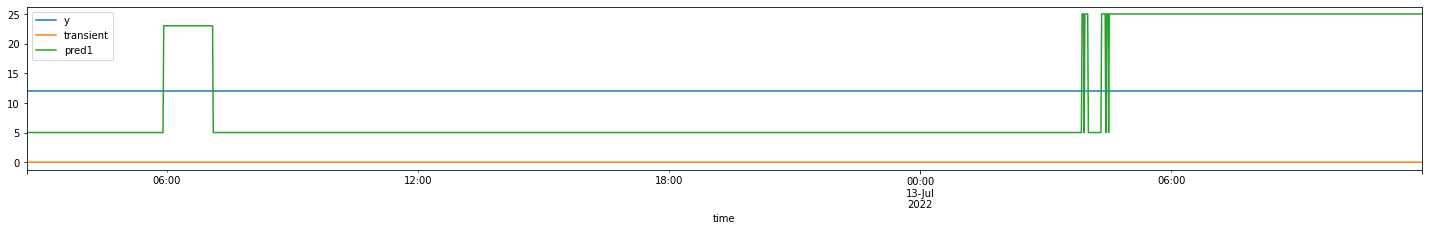

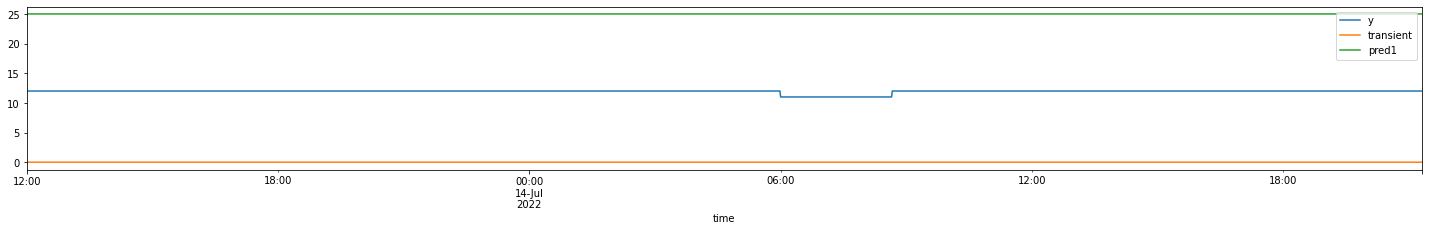

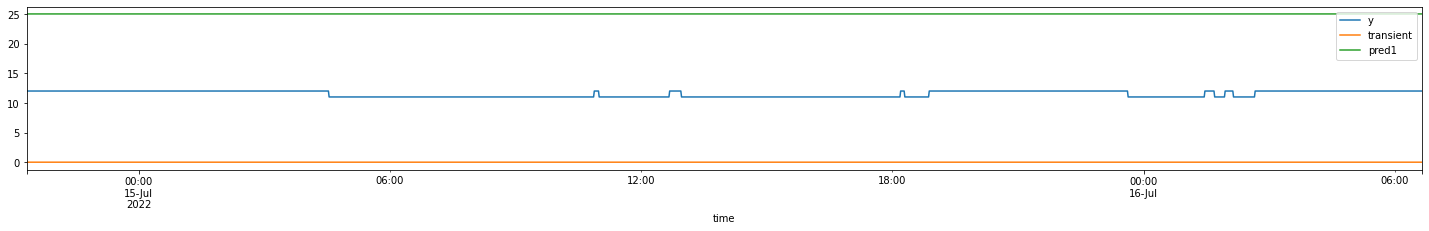

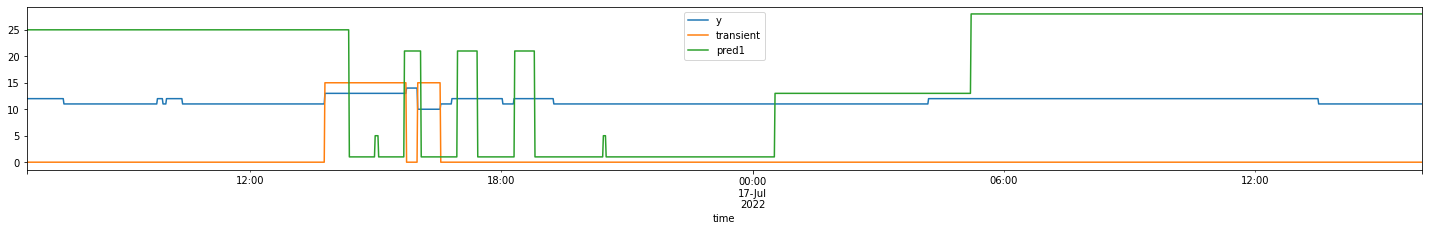

In [8]:
chunk_size = 2000
for i in range(y.shape[0] // chunk_size + 1):
    _, ax = plt.subplots(figsize=FIGSIZE_NARROW)
    y.iloc[i * chunk_size:(i + 1) * chunk_size].plot(ax=ax, label='y')
    transient.iloc[i * chunk_size:(i + 1) * chunk_size].plot(ax=ax, label='transient')
    for numpred, ipred in enumerate(pred):
        ipred.iloc[i * chunk_size:(i + 1) * chunk_size].plot(ax=ax, label=f'pred{numpred + 1}')
    ax.legend()
    if i > 10:
        break